In [ ]:
import contractions
import emoji
import string 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from google_trans_new import google_translator
from lingua import Language, LanguageDetectorBuilder


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JoeTe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\JoeTe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JoeTe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Gensim (Word2Vec, Doc2Vec)
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, classification_report, silhouette_score, calinski_harabasz_score
from sklearn.datasets import load_files
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD 
from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
# Remove emojis 
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF" 
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_stopwords(reviews):
    STOPWORDS = stopwords.words('english')
    STOPWORDS.remove('not')
    STOPWORDS.remove('is')
    STOPWORDS.remove('but')
    if STOPWORDS is None:
        STOPWORDS = set(stopwords.words('english'))
    return ' '.join([word for word in reviews.split() if word not in STOPWORDS])

def remove_extra_whitespace(reviews):
    return " ".join(reviews.split())

def get_wordnet_pos(text):
    # Map POS tag to first character lemmatize() accepts
    tags = nltk.pos_tag(text)
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    tags = [tag_dict.get(tag[1][0],  wordnet.NOUN) for tag in tags]
    return tags

def lemmaSentence(reviews):
    lemmatizer = WordNetLemmatizer()
    lemma_text = ''
    tok_text = word_tokenize(reviews)
    tags = get_wordnet_pos(tok_text)
    for i in range(len(tok_text)):
        lemma_text = lemma_text + ' ' + lemmatizer.lemmatize(tok_text[i], tags[i])
    return lemma_text[1:]

def lower_case(review):
    
    return review.lower()

# change contraction words such sa I'm = I am, shouldn't = should not
def change_contractions(review):
    
    expanded_words = [contractions.fix(word) for word in review.split()]

    expanded_review = ' '.join(expanded_words)
    return expanded_review

# Remove Punctuations
def remove_punctuations(review):
    
    new_review = review.translate(str.maketrans('', '', string.punctuation))
    return new_review

# Remove numbers
def remove_numbers(review):
    
    mapping = str.maketrans('', '', string.digits)
    new_review = review.translate(mapping)
    
    return new_review

In [ ]:

def clean_text(data):

    data['concat_review'] = data['concat_review'].apply(lower_case)
    data['concat_review'] = data['concat_review'].apply(change_contractions)
    data['concat_review'] = data['concat_review'].apply(remove_emojis)
    data['concat_review'] = data['concat_review'].apply(remove_punctuations)
    data['concat_review'] = data['concat_review'].apply(remove_numbers)
    data['concat_review'] = data['concat_review'].apply(remove_stopwords)
    data['concat_review'] = data['concat_review'].apply(remove_extra_whitespace)
    data['concat_review'] = data['concat_review'].apply(lemmaSentence)
    
    return data

In [ ]:
test_df = pd.read_csv('train_test_dataset/test_df_Gx.csv')

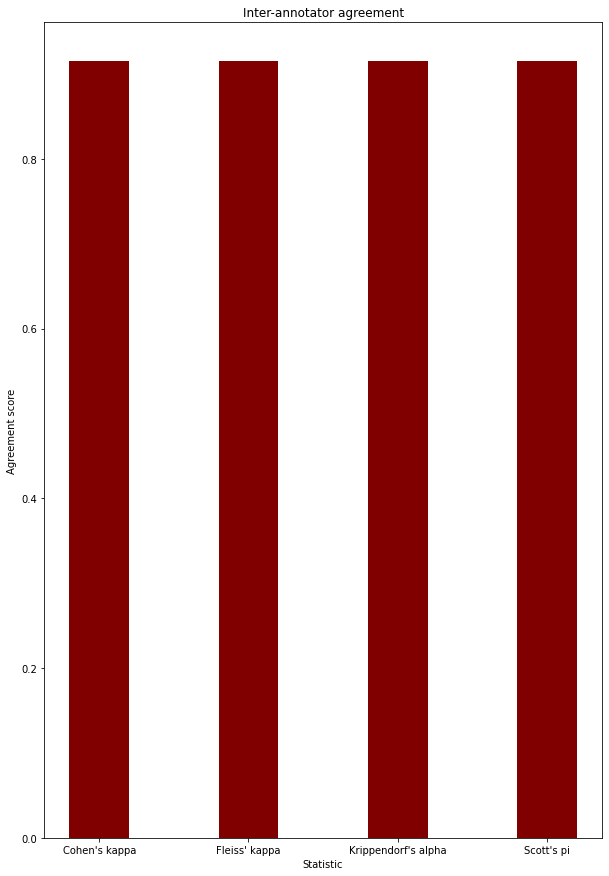

In [ ]:
## Interannotator agreement

from nltk import agreement
import matplotlib.pyplot as plt

annotator_1 = test_df["Annotator_1"].to_numpy()
annotator_2 = test_df["Annotator_2"].to_numpy()

taskdata=[[0,str(i),str(annotator_1[i])] for i in range(0,len(annotator_1))]+[[1,str(i),str(annotator_2[i])] for i in range(0,len(annotator_2))]
ratingtask = agreement.AnnotationTask(data=taskdata)

cohen_kappa = ratingtask.kappa()
fleiss_kappa = ratingtask.multi_kappa()
krippendorf_alpha = ratingtask.alpha()
scotts_pi = ratingtask.pi()

scores = {"Cohen's kappa": cohen_kappa, "Fleiss' kappa": fleiss_kappa, "Krippendorf's alpha": krippendorf_alpha, "Scott's pi" : scotts_pi}

statistic = list(scores.keys())
values = list(scores.values())

fig = plt.figure(figsize = (10, 15))
plt.bar(statistic, values, color ='maroon',
        width = 0.4)
plt.xlabel("Statistic")
plt.ylabel("Agreement score")
plt.title("Inter-annotator agreement")
plt.show()

In [ ]:
test_df['concat_review'] = test_df['reviewTitle'] + '. ' + test_df['reviewDescription']
test_df = clean_text(test_df)

In [ ]:
data = pd.read_csv('train_test_dataset/train_df_imbalanced.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20961 entries, 0 to 20960
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         20961 non-null  int64 
 1   productAsin        20961 non-null  object
 2   ratingScore        20961 non-null  int64 
 3   reviewTitle        20960 non-null  object
 4   reviewReaction     5883 non-null   object
 5   reviewDescription  20961 non-null  object
 6   isVerified         20961 non-null  bool  
 7   category           20961 non-null  object
 8   languages          20961 non-null  object
 9   concat_review      20961 non-null  object
 10  polarity           20961 non-null  int64 
dtypes: bool(1), int64(3), object(7)
memory usage: 1.6+ MB


In [ ]:
# Pre-processing of datafame
clean_data_df = clean_text(data)
clean_data_df

,Unnamed: 0,productAsin,ratingScore,reviewTitle,reviewReaction,reviewDescription,isVerified,category,languages,concat_review,polarity
0,9406,B08NLXR9V5,4,Girl Alone,One person found this helpful,"My first Blake Pierce book was enjoyable, fast...",True,mystery,Language.ENGLISH,girl alone first blake pierce book enjoyable f...,1
1,5701,670062510,5,A great book for young people. It has a great...,NaN,My favorite book when I was young. I read it ...,True,children,Language.ENGLISH,great book young people great story favorite b...,1
2,13621,1542046599,1,More gripes than hypes,One person found this helpful,This is the first book I‚Äôve read by this aut...,True,mystery,Language.ENGLISH,gripe hype be first book i‚äôve read author th...,-1
3,5021,399226907,5,Add this book to your collection,NaN,Cute and educational book to teach counting an...,True,children,Language.ENGLISH,add book collection cute educational book teac...,1
4,21354,125030170X,2,Just okay.,NaN,This is one of those books you can read in a c...,False,children,Language.ENGLISH,okay be one book read couple day story okay,0
...,...,...,...,...,...,...,...,...,...,...,...
20956,12474,1542046599,5,Great read; couldn‚Äôt put it down,NaN,The first chapter reads from an odd point of v...,True,mystery,Language.ENGLISH,great read couldn‚äôt put first chapter read o...,1
20957,22518,125030170X,1,Used books?,NaN,They are purchased as new and I received the o...,True,children,Language.ENGLISH,use book purchase new receive original replace...,-1
20958,5670,670062510,4,My 7th graders not only love this book but the...,NaN,My 7th graders not only love this book but the...,True,children,Language.ENGLISH,th grader not love book but hard bound be must...,1
20959,891,B01IW9TM5O,5,One of my favorite books ever - read almost al...,One person found this helpful,One of my favorite books ever - read almost al...,True,humor_entertainment,Language.ENGLISH,one favorite book ever read almost one favorit...,1


In [ ]:
# Check if the dataset is balanced
clean_data_df["polarity"].value_counts()

 1    13246
-1     7518
 0      197
Name: polarity, dtype: int64

In [ ]:
# Shit ton of positive reviews but not much neutral and negative reviews
# We can concat more neutral and negative reviews so should be fine

# Balancing the positive reviews and negative reviews

# Drop the excess positive reviews randomly
differences = clean_data_df["polarity"].value_counts()[1]-clean_data_df["polarity"].value_counts()[-1]
balanced_df = clean_data_df.drop(clean_data_df[clean_data_df["polarity"] == 1].sample(differences,random_state=42).index)
balanced_df

,Unnamed: 0,productAsin,ratingScore,reviewTitle,reviewReaction,reviewDescription,isVerified,category,languages,concat_review,polarity
1,5701,670062510,5,A great book for young people. It has a great...,NaN,My favorite book when I was young. I read it ...,True,children,Language.ENGLISH,great book young people great story favorite b...,1
2,13621,1542046599,1,More gripes than hypes,One person found this helpful,This is the first book I‚Äôve read by this aut...,True,mystery,Language.ENGLISH,gripe hype be first book i‚äôve read author th...,-1
3,5021,399226907,5,Add this book to your collection,NaN,Cute and educational book to teach counting an...,True,children,Language.ENGLISH,add book collection cute educational book teac...,1
4,21354,125030170X,2,Just okay.,NaN,This is one of those books you can read in a c...,False,children,Language.ENGLISH,okay be one book read couple day story okay,0
5,23286,63215381,1,The paperback‚Äôs quality sucks,1,I hate this paperback. Terrible quality! The p...,True,children,Language.ENGLISH,paperback‚äôs quality suck hate paperback terr...,-1
...,...,...,...,...,...,...,...,...,...,...,...
20951,4658,385376715,5,Awesome book!,NaN,I love this book. I purchased it for a baby sh...,True,children,Language.ENGLISH,awesome book love book purchase baby shower gi...,1
20953,6580,9387779262,4,Good,NaN,Books were smaller than I expected...but still...,True,children,Language.ENGLISH,good book small expectedbut still goodperfect ...,1
20954,23094,194563183X,1,X rated,NaN,I wish I had known how pornographic this book ...,True,children,Language.ENGLISH,x rat wish know pornographic book buy buyer be...,-1
20957,22518,125030170X,1,Used books?,NaN,They are purchased as new and I received the o...,True,children,Language.ENGLISH,use book purchase new receive original replace...,-1


Text(0, 0.5, 'Frequency')

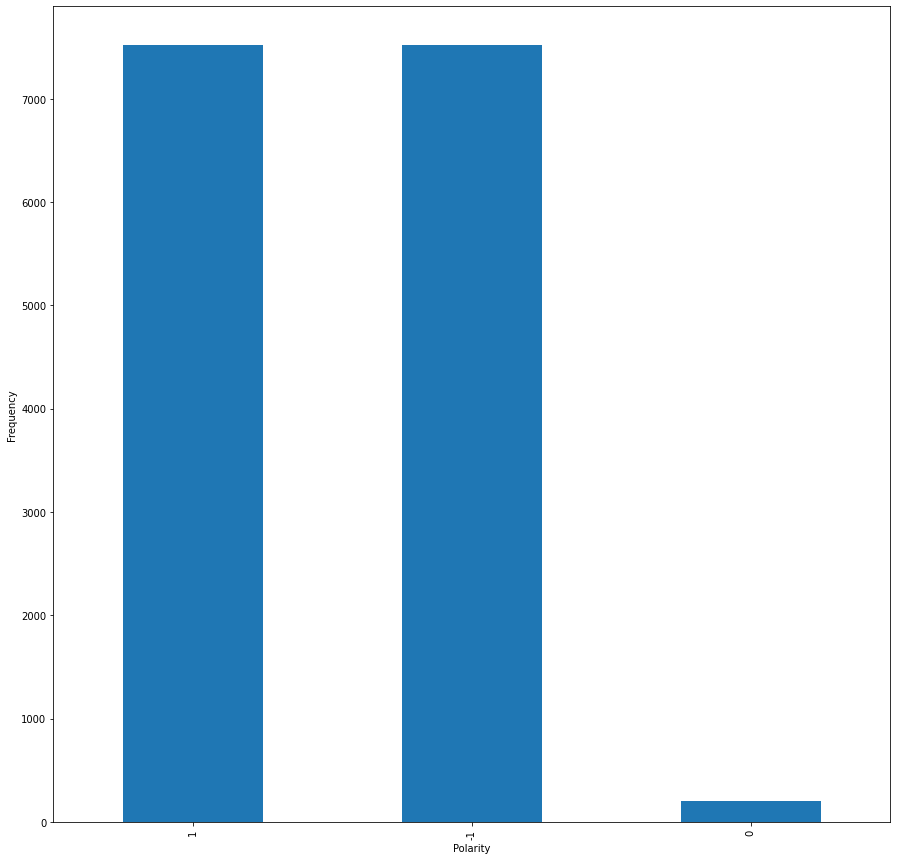

In [ ]:
balanced_df['polarity'].value_counts(sort=False).plot.bar(figsize=(15,15))
plt.xlabel('Polarity')
plt.ylabel('Frequency')

#### Visualization

In [ ]:
def get_wordcloud(text, color='viridis'):
  # Create a WordCloud object
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', colormap=color)
  # Generate a word cloud
  return wordcloud.generate(text)

(-0.5, 399.5, 199.5, -0.5)

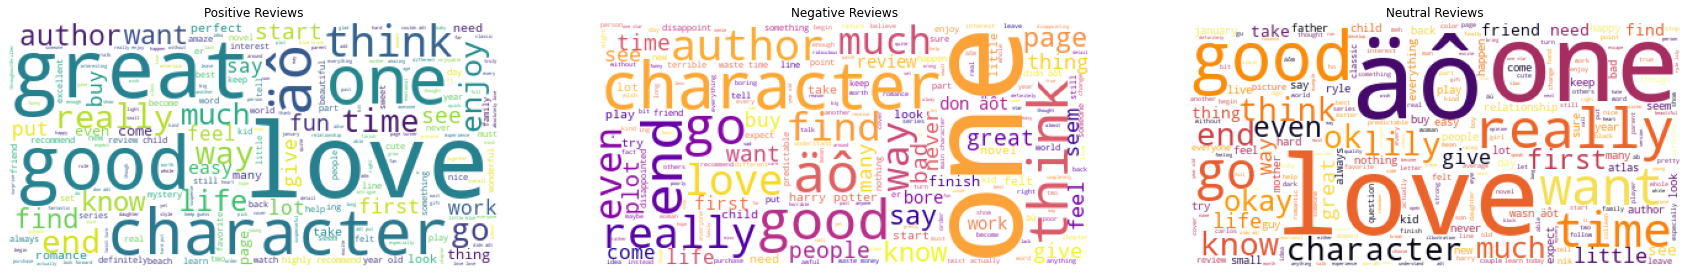

In [ ]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(balanced_df['concat_review'][balanced_df['polarity']==1].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')


# Wordcloud for negative reviews
neg_reviews = ' '.join(balanced_df['concat_review'][balanced_df['polarity']==-1].values)

# Common words
words = ['well', 'make', 'book', 'use', 'read', 'write','story','character']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(balanced_df['concat_review'][balanced_df['polarity']==0].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story','character']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')



## Modelling

In [ ]:
X = balanced_df["concat_review"].values
Y = balanced_df["polarity"].values

unseen_X_test = test_df['concat_review'].values
unseen_Y_test = test_df['Annotator_1'].values

### Train Test split 

### I redid the train test split using seed = 42

### After starting on the project I realised our steps should be

#### 1. Crawl the dataset ( crawl a shit ton maybe 100k? )
#### 2. Do data processing (Remove duplicates/Null/Non-english etc) 
#### 3. Use ratings to determine polarity and balance the dataset (Positive count == Negative count)
#### 4. Split the dataset (Train = 80% and Test = 20%)  I think there is a method to determine the best split but I am no expert lols
#### 5. Re annotate for test dataset(i can fake the annotations so this is pretty chill) + Inter annotator agreement
#### 5.5. OR we can crawl additional test dataset(unseen), do our data processing + self annotations + Inter annotator agreement
#### 6. Train model + evaluation(with #4 test set and #5.5 unseen test dataset)


In [ ]:
# Train and test split 
# 80 train 20 test split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Different methods of vectorizing text

**Bag-of-words Tf-Idf**

In [ ]:
# Tf-Idf representation
tfidf_vect = TfidfVectorizer(min_df=5, max_features=10000, ngram_range=(1,2), lowercase=False, tokenizer=word_tokenize)

X_train_tfidf = tfidf_vect.fit_transform(X_train)
x_test_tfidf = tfidf_vect.transform(x_test)
unseen_X_test_tfidf = tfidf_vect.transform(unseen_X_test)

Word2Vec - Averaged vector

Link: https://rare-technologies.com/word2vec-tutorial/

## TBH i don't fully understand this, I am following a tutorial for now on this

In [ ]:
# Tokenization
X_train_tok = [word_tokenize(sentence) for sentence in X_train]
x_test_tok = [word_tokenize(sentence) for sentence in x_test]
unseen_X_test_tok = [word_tokenize(sentence) for sentence in unseen_X_test]

In [ ]:
# Word2Vec model
model_word2vec = Word2Vec(min_count=10,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

In [ ]:
# Building vocabulary
model_word2vec.build_vocab(X_train_tok)

In [ ]:
# Training model
model_word2vec.train(X_train_tok, total_examples=model_word2vec.corpus_count, epochs=30, report_delay=1)
model_word2vec.save("model/word2vec.model")

In [ ]:
model_word2vec = gensim.models.word2vec.Word2Vec.load("model/word2vec.model")

In [ ]:
# Compute mean vector given the word2vec vector for every word in a document
def get_mean_vector(model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in model.wv.key_to_index]
    if len(words) >= 1:
        return model.wv.get_mean_vector(words)
    else:
        return np.zeros(300)

In [ ]:
# Get the mean vector
X_train_Word2Vec = [get_mean_vector(model_word2vec, review) for review in X_train_tok]
x_test_Word2Vec = [get_mean_vector(model_word2vec, review) for review in x_test_tok]
unseen_X_test_Word2Vec = [get_mean_vector(model_word2vec, review) for review in unseen_X_test_tok]

In [ ]:
# Scaling values between 0 and 1
# Gotta investigate if it affects -1(negative) but MultinomialNB dont accept neg values so abit sus

# Maybe can use Gaussian NB
scaler_Word2Vec = MinMaxScaler(feature_range=(0,1))
X_train_Word2Vec = scaler_Word2Vec.fit_transform(X_train_Word2Vec)
x_test_Word2Vec = scaler_Word2Vec.transform(x_test_Word2Vec)
unseen_X_test_Word2Vec = scaler_Word2Vec.transform(unseen_X_test_Word2Vec)

## Doc2Vec

In [ ]:
# Tag all the documents
tagged_data = [TaggedDocument(doc, tags=[str(i)]) for i, doc in enumerate(X_train_tok)]

In [ ]:
# Building of the Doc2Vec model
model_doc2vec = gensim.models.doc2vec.Doc2Vec(vector_size=100, window=5, min_count=2, epochs=10)
model_doc2vec.build_vocab(tagged_data)
model_doc2vec.train(tagged_data, total_examples=model_doc2vec.corpus_count, epochs=model_doc2vec.epochs)

In [ ]:
model_doc2vec.save("model/doc2vec.model")


In [ ]:
model_doc2vec = gensim.models.doc2vec.Doc2Vec.load("model/doc2vec.model")

In [ ]:
# Get the vectors for every document
X_train_Doc2Vec = model_doc2vec.dv.vectors
x_test_Doc2Vec = [model_doc2vec.infer_vector(doc) for doc in x_test_tok]
unseen_X_test_Doc2Vec = [model_doc2vec.infer_vector(doc) for doc in unseen_X_test_tok]

In [ ]:
# Scaling values between 0 and 1

# Gotta investigate if it affects
scaler_Doc2Vec = MinMaxScaler(feature_range=(0,1))
X_train_Doc2Vec = scaler_Doc2Vec.fit_transform(X_train_Doc2Vec)
x_test_Doc2Vec = scaler_Doc2Vec.transform(x_test_Doc2Vec)
unseen_X_test_Doc2Vec = scaler_Doc2Vec.transform(unseen_X_test_Doc2Vec)

## Testing different models

## Bag-of-words Tf-Idf

#### Naive Bayes

In [ ]:

# Naive bayes
naive_bayes_BOW = MultinomialNB()
naive_bayes_BOW.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [ ]:
naive_bayes_BOW_prediction = naive_bayes_BOW.predict(x_test_tfidf)

print(classification_report(y_test, naive_bayes_BOW_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.89008   0.89247   0.89128      1488
           0    0.00000   0.00000   0.00000        40
           1    0.88746   0.90849   0.89785      1519

    accuracy                        0.88874      3047
   macro avg    0.59251   0.60032   0.59638      3047
weighted avg    0.87709   0.88874   0.88285      3047



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
unseen_naive_bayes_BOW_prediction = naive_bayes_BOW.predict(unseen_X_test_tfidf)
print(classification_report(unseen_Y_test, unseen_naive_bayes_BOW_prediction, digits = 5))

              precision    recall  f1-score   support

          -1    0.74658   0.95197   0.83685       229
           0    0.00000   0.00000   0.00000        16
           1    0.97325   0.88743   0.92836       533

    accuracy                        0.88817       778
   macro avg    0.57328   0.61313   0.58840       778
weighted avg    0.88651   0.88817   0.88233       778



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
from sklearn import metrics
print("MultinomialNB Accuracy for Bag of words TF-IDF:",metrics.accuracy_score(y_test, naive_bayes_BOW_prediction))
print("Unseen MultinomialNB Accuracy for Bag of words TF-IDF:",metrics.accuracy_score(unseen_Y_test,  unseen_naive_bayes_BOW_prediction))
naive_bayes_BOW_score = metrics.accuracy_score(y_test, naive_bayes_BOW_prediction)
unseen_naive_bayes_BOW_score = metrics.accuracy_score(unseen_Y_test, unseen_naive_bayes_BOW_prediction)

MultinomialNB Accuracy for Bag of words TF-IDF: 0.8887430259271415
Unseen MultinomialNB Accuracy for Bag of words TF-IDF: 0.8881748071979434


#### Linear SVC

In [ ]:
# Support vector machine
Linear_SVC_BOW = LinearSVC(max_iter=3000)
Linear_SVC_BOW.fit(X_train_tfidf, Y_train)

LinearSVC(max_iter=3000)

In [ ]:
Linear_SVC_BOW_prediction = Linear_SVC_BOW.predict(x_test_tfidf)
print(classification_report(y_test, Linear_SVC_BOW_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.89029   0.89987   0.89505      1488
           0    0.66667   0.05000   0.09302        40
           1    0.89416   0.90652   0.90029      1519

    accuracy                        0.89202      3047
   macro avg    0.81704   0.61879   0.62946      3047
weighted avg    0.88928   0.89202   0.88714      3047



In [ ]:
unseen_Linear_SVC_BOW_prediction = Linear_SVC_BOW.predict(unseen_X_test_tfidf)
print(classification_report(unseen_Y_test, unseen_Linear_SVC_BOW_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.73469   0.94323   0.82600       229
           0    0.00000   0.00000   0.00000        16
           1    0.97101   0.87992   0.92323       533

    accuracy                        0.88046       778
   macro avg    0.56857   0.60772   0.58308       778
weighted avg    0.88149   0.88046   0.87562       778



In [ ]:
print("Linear SVC Accuracy for Bag of words TF-IDF:",metrics.accuracy_score(y_test, Linear_SVC_BOW_prediction))
print("Unseen Linear SVC Accuracy for Bag of words TF-IDF:",metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_BOW_prediction))
Linear_SVC_BOW_score = metrics.accuracy_score(y_test, Linear_SVC_BOW_prediction)
unseen_Linear_SVC_BOW_score = metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_BOW_prediction)

Linear SVC Accuracy for Bag of words TF-IDF: 0.8920249425664588
Unseen Linear SVC Accuracy for Bag of words TF-IDF: 0.8804627249357326


#### Logistic Regression

In [ ]:
# Logistic regression
Logistic_Regression_BOW = LogisticRegression(max_iter=3000)
Logistic_Regression_BOW.fit(X_train_tfidf, Y_train)

LogisticRegression(max_iter=3000)

In [ ]:
Logistic_Regression_BOW_prediction = Logistic_Regression_BOW.predict(x_test_tfidf)
print(classification_report(y_test, Logistic_Regression_BOW_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.89168   0.90726   0.89940      1488
           0    1.00000   0.02500   0.04878        40
           1    0.90013   0.90783   0.90397      1519

    accuracy                        0.89596      3047
   macro avg    0.93060   0.61336   0.61738      3047
weighted avg    0.89731   0.89596   0.89051      3047



In [ ]:
unseen_Logistic_Regression_BOW_prediction = Logistic_Regression_BOW.predict(unseen_X_test_tfidf)
print(classification_report(unseen_Y_test, unseen_Logistic_Regression_BOW_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.72131   0.96070   0.82397       229
           0    0.00000   0.00000   0.00000        16
           1    0.97674   0.86679   0.91849       533

    accuracy                        0.87661       778
   macro avg    0.56602   0.60916   0.58082       778
weighted avg    0.88147   0.87661   0.87178       778



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
print("Logistic Regression Accuracy for Bag of words TF-IDF:",metrics.accuracy_score(y_test, Logistic_Regression_BOW_prediction))
print("Unseen_Logistic Regression Accuracy for Bag of words TF-IDF:",metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_BOW_prediction))
Logistic_Regression_BOW_score = metrics.accuracy_score(y_test, Logistic_Regression_BOW_prediction)
unseen_Logistic_Regression_BOW_score = metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_BOW_prediction)

Logistic Regression Accuracy for Bag of words TF-IDF: 0.8959632425336397
Unseen_Logistic Regression Accuracy for Bag of words TF-IDF: 0.8766066838046273


## Word2Vec - Averaged vector

#### Naive Bayes

In [ ]:
naive_bayes_Word2Vec = MultinomialNB()
naive_bayes_Word2Vec.fit(X_train_Word2Vec, Y_train)

MultinomialNB()

In [ ]:
naive_bayes_Word2Vec_prediction = naive_bayes_Word2Vec.predict(x_test_Word2Vec)
print(classification_report(y_test, naive_bayes_Word2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.81303   0.90591   0.85696      1488
           0    0.00000   0.00000   0.00000        40
           1    0.89057   0.81435   0.85076      1519

    accuracy                        0.84838      3047
   macro avg    0.56787   0.57342   0.56924      3047
weighted avg    0.84101   0.84838   0.84262      3047



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
unseen_naive_bayes_Word2Vec_prediction = naive_bayes_Word2Vec.predict(unseen_X_test_Word2Vec)
print(classification_report(unseen_Y_test, unseen_naive_bayes_Word2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.60767   0.89956   0.72535       229
           0    0.00000   0.00000   0.00000        16
           1    0.94305   0.77674   0.85185       533

    accuracy                        0.79692       778
   macro avg    0.51691   0.55877   0.52573       778
weighted avg    0.82494   0.79692   0.79710       778



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
print("MultinomialNB Accuracy for Word2Vec:",metrics.accuracy_score(y_test, naive_bayes_Word2Vec_prediction))
print("Unseen MultinomialNB Accuracy for Word2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_naive_bayes_Word2Vec_prediction))
naive_bayes_Word2Vec_score = metrics.accuracy_score(y_test, naive_bayes_Word2Vec_prediction)
unseen_naive_bayes_Word2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_naive_bayes_Word2Vec_prediction)

MultinomialNB Accuracy for Word2Vec: 0.8483754512635379
Unseen MultinomialNB Accuracy for Word2Vec: 0.7969151670951157


#### Linear SVC

In [ ]:
# Support vector machine
Linear_SVC_Word2Vec = LinearSVC(max_iter=5000)
Linear_SVC_Word2Vec.fit(X_train_Word2Vec, Y_train)

LinearSVC(max_iter=5000)

In [ ]:
Linear_SVC_Word2Vec_prediction = Linear_SVC_Word2Vec.predict(x_test_Word2Vec)
print(classification_report(y_test, Linear_SVC_Word2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.87435   0.89785   0.88594      1488
           0    0.50000   0.02500   0.04762        40
           1    0.88926   0.88808   0.88867      1519

    accuracy                        0.88152      3047
   macro avg    0.75453   0.60364   0.60741      3047
weighted avg    0.87686   0.88152   0.87630      3047



In [ ]:
unseen_Linear_SVC_Word2Vec_prediction = Linear_SVC_Word2Vec.predict(unseen_X_test_Word2Vec)
print(classification_report(unseen_Y_test, unseen_Linear_SVC_Word2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.69085   0.95633   0.80220       229
           0    0.00000   0.00000   0.00000        16
           1    0.97397   0.84240   0.90342       533

    accuracy                        0.85861       778
   macro avg    0.55494   0.59958   0.56854       778
weighted avg    0.87061   0.85861   0.85505       778



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
print("Linear SVC Accuracy for Linear_SVC_Word2Vec:",metrics.accuracy_score(y_test, Linear_SVC_Word2Vec_prediction))
print("unseen Linear SVC Accuracy for Linear_SVC_Word2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_Word2Vec_prediction))
Linear_SVC_Word2Vec_score = metrics.accuracy_score(y_test, Linear_SVC_Word2Vec_prediction)
unseen_Linear_SVC_Word2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_Word2Vec_prediction)

Linear SVC Accuracy for Linear_SVC_Word2Vec: 0.8815228093206433
unseen Linear SVC Accuracy for Linear_SVC_Word2Vec: 0.8586118251928021


#### Logistic Regression

In [ ]:
# Logistic regression
Logistic_Regression_Word2Vec = LogisticRegression(max_iter=5000)
Logistic_Regression_Word2Vec.fit(X_train_Word2Vec, Y_train)

LogisticRegression(max_iter=5000)

In [ ]:
Logistic_Regression_Word2Vec_prediction = Logistic_Regression_Word2Vec.predict(x_test_Word2Vec)
print(classification_report(y_test, Logistic_Regression_Word2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.86962   0.89651   0.88286      1488
           0    0.50000   0.02500   0.04762        40
           1    0.88749   0.88282   0.88515      1519

    accuracy                        0.87824      3047
   macro avg    0.75237   0.60144   0.60521      3047
weighted avg    0.87368   0.87824   0.87304      3047



In [ ]:
unseen_Logistic_Regression_Word2Vec_prediction = Logistic_Regression_Word2Vec.predict(unseen_X_test_Word2Vec)
print(classification_report(unseen_Y_test, unseen_Logistic_Regression_Word2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.69649   0.95197   0.80443       229
           0    0.00000   0.00000   0.00000        16
           1    0.97204   0.84803   0.90581       533

    accuracy                        0.86118       778
   macro avg    0.55618   0.60000   0.57008       778
weighted avg    0.87094   0.86118   0.85734       778



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
print("Logistic Regression Accuracy for Logistic_Regression_Word2Vec:",metrics.accuracy_score(y_test, Logistic_Regression_Word2Vec_prediction))
print("Unseen Logistic Regression Accuracy for Logistic_Regression_Word2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_Word2Vec_prediction))
Logistic_Regression_Word2Vec_score = metrics.accuracy_score(y_test, Logistic_Regression_Word2Vec_prediction)
unseen_Logistic_Regression_Word2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_Word2Vec_prediction)

Logistic Regression Accuracy for Logistic_Regression_Word2Vec: 0.8782408926813259
Unseen Logistic Regression Accuracy for Logistic_Regression_Word2Vec: 0.8611825192802056


## Doc2Vec

#### Naive Bayes

In [ ]:
naive_bayes_Doc2Vec = MultinomialNB()
naive_bayes_Doc2Vec.fit(X_train_Doc2Vec, Y_train)

MultinomialNB()

In [ ]:
naive_bayes_Doc2Vec_prediction = naive_bayes_Doc2Vec.predict(x_test_Doc2Vec)
print(classification_report(y_test, naive_bayes_Doc2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.70906   0.62567   0.66476      1488
           0    0.00000   0.00000   0.00000        40
           1    0.66321   0.75708   0.70704      1519

    accuracy                        0.68297      3047
   macro avg    0.45742   0.46092   0.45727      3047
weighted avg    0.67689   0.68297   0.67711      3047



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
unseen_naive_bayes_Doc2Vec_prediction = naive_bayes_Doc2Vec.predict(unseen_X_test_Doc2Vec)
print(classification_report(unseen_Y_test, unseen_naive_bayes_Doc2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.47987   0.62445   0.54269       229
           0    0.00000   0.00000   0.00000        16
           1    0.80000   0.72045   0.75814       533

    accuracy                        0.67738       778
   macro avg    0.42662   0.44830   0.43361       778
weighted avg    0.68932   0.67738   0.67914       778



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
print("MultinomialNB Accuracy for Doc2Vec:",metrics.accuracy_score(y_test, naive_bayes_Doc2Vec_prediction))
print("Unseen MultinomialNB Accuracy for Doc2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_naive_bayes_Doc2Vec_prediction))
naive_bayes_Doc2Vec_score = metrics.accuracy_score(y_test, naive_bayes_Doc2Vec_prediction)
unseen_naive_bayes_Doc2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_naive_bayes_Doc2Vec_prediction)

MultinomialNB Accuracy for Doc2Vec: 0.6829668526419429
Unseen MultinomialNB Accuracy for Doc2Vec: 0.6773778920308483


#### Linear SVC

In [ ]:
# Support vector machine
Linear_SVC_Doc2Vec = LinearSVC(max_iter=5000)
Linear_SVC_Doc2Vec.fit(X_train_Doc2Vec, Y_train)

LinearSVC(max_iter=5000)

In [ ]:
Linear_SVC_Doc2Vec_prediction = Linear_SVC_Doc2Vec.predict(x_test_Doc2Vec)
print(classification_report(y_test, Linear_SVC_Doc2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.80081   0.79704   0.79892      1488
           0    0.00000   0.00000   0.00000        40
           1    0.79310   0.81764   0.80519      1519

    accuracy                        0.79685      3047
   macro avg    0.53130   0.53823   0.53470      3047
weighted avg    0.78646   0.79685   0.79156      3047



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
unseen_Linear_SVC_Doc2Vec_prediction = Linear_SVC_Doc2Vec.predict(unseen_X_test_Doc2Vec)
print(classification_report(unseen_Y_test, unseen_Linear_SVC_Doc2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.58610   0.84716   0.69286       229
           0    0.00000   0.00000   0.00000        16
           1    0.91275   0.76548   0.83265       533

    accuracy                        0.77378       778
   macro avg    0.49962   0.53755   0.50850       778
weighted avg    0.79783   0.77378   0.77438       778



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
print("Linear_SVC Accuracy for Doc2Vec:",metrics.accuracy_score(y_test, Linear_SVC_Doc2Vec_prediction))
print("Unseen Linear_SVC Accuracy for Doc2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_Doc2Vec_prediction))
Linear_SVC_Doc2Vec_score = metrics.accuracy_score(y_test, Linear_SVC_Doc2Vec_prediction)
unseen_Linear_SVC_Doc2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_Doc2Vec_prediction)

Linear_SVC Accuracy for Doc2Vec: 0.7968493600262553
Unseen Linear_SVC Accuracy for Doc2Vec: 0.7737789203084833


#### Logistic Regression

In [ ]:
Logistic_Regression_Doc2Vec= LogisticRegression(max_iter=5000)
Logistic_Regression_Doc2Vec.fit(X_train_Doc2Vec, Y_train)

LogisticRegression(max_iter=5000)

In [ ]:
Logistic_Regression_Doc2Vec_prediction = Logistic_Regression_Doc2Vec.predict(x_test_Doc2Vec)
print(classification_report(y_test, Logistic_Regression_Doc2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.81369   0.80712   0.81039      1488
           0    0.00000   0.00000   0.00000        40
           1    0.80458   0.83213   0.81812      1519

    accuracy                        0.80899      3047
   macro avg    0.53942   0.54642   0.54284      3047
weighted avg    0.79847   0.80899   0.80361      3047



c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoeTe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
unseen_Logistic_Regression_Doc2Vec_prediction = Logistic_Regression_Doc2Vec.predict(unseen_X_test_Doc2Vec)
print(classification_report(unseen_Y_test, unseen_Logistic_Regression_Doc2Vec_prediction, digits=5))

              precision    recall  f1-score   support

          -1    0.59337   0.86026   0.70232       229
           0    0.00000   0.00000   0.00000        16
           1    0.91461   0.76360   0.83231       533

    accuracy                        0.77635       778
   macro avg    0.50266   0.54129   0.51154       778
weighted avg    0.80124   0.77635   0.77693       778



In [ ]:
print("Logistic Regression Accuracy for Doc2Vec:",metrics.accuracy_score(y_test, Logistic_Regression_Doc2Vec_prediction))
print("Unseen Logistic Regression Accuracy for Doc2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_Doc2Vec_prediction))
Logistic_Regression_Doc2Vec_score = metrics.accuracy_score(y_test, Logistic_Regression_Doc2Vec_prediction)
unseen_Logistic_Regression_Doc2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_Doc2Vec_prediction)

Logistic Regression Accuracy for Doc2Vec: 0.8089924515917296
Unseen Logistic Regression Accuracy for Doc2Vec: 0.7763496143958869


## Comparing the models

<BarContainer object of 3 artists>

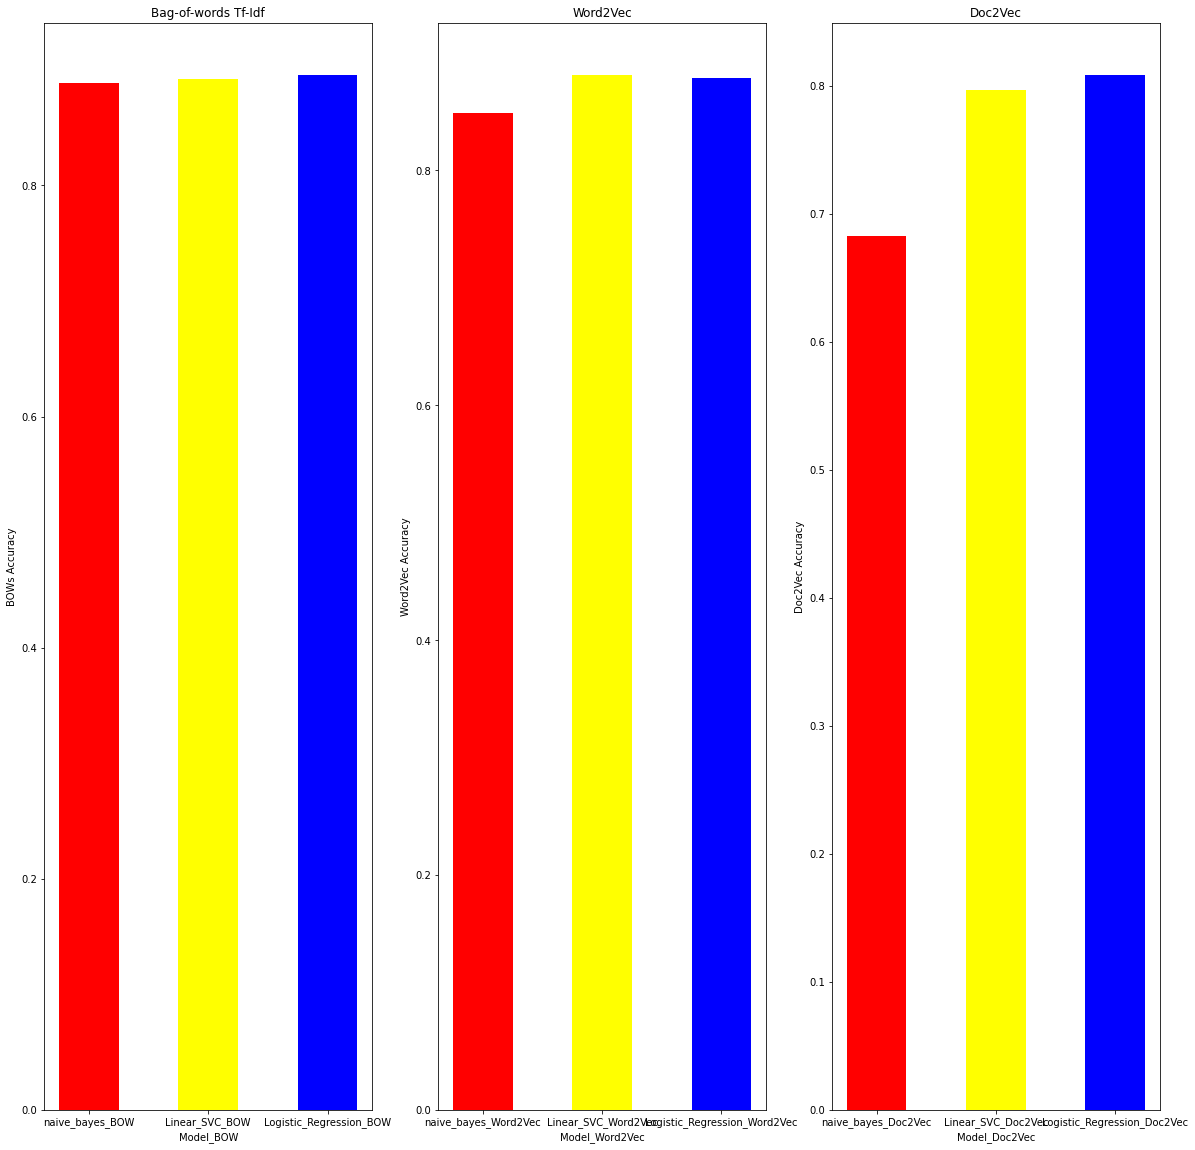

In [ ]:
fig, axes =plt.subplots(1,3, figsize=(20,20))
# Bag of Words classifiers
classifiers = ["naive_bayes_BOW", "Linear_SVC_BOW", "Logistic_Regression_BOW"]

color_discrete_map=['red', 'yellow', 'blue']
accuracy = [naive_bayes_BOW_score, Linear_SVC_BOW_score, Logistic_Regression_BOW_score]
axes[0].set_title('Bag-of-words Tf-Idf')
axes[0].set_xlabel('Model_BOW')
axes[0].set_ylabel('BOWs Accuracy')
axes[0].bar(classifiers, accuracy, color = color_discrete_map, width=0.5)


# Word2Vec classifiers
classifiers = ["naive_bayes_Word2Vec", "Linear_SVC_Word2Vec", "Logistic_Regression_Word2Vec"]

color_discrete_map=['red', 'yellow', 'blue']
accuracy = [naive_bayes_Word2Vec_score, Linear_SVC_Word2Vec_score, Logistic_Regression_Word2Vec_score]
axes[1].set_title('Word2Vec')
axes[1].set_xlabel('Model_Word2Vec')
axes[1].set_ylabel('Word2Vec Accuracy')
axes[1].bar(classifiers, accuracy, color = color_discrete_map, width=0.5)


# Doc2Vec classifiers
classifiers = ["naive_bayes_Doc2Vec", "Linear_SVC_Doc2Vec", "Logistic_Regression_Doc2Vec"]

color_discrete_map=['red', 'yellow', 'blue']
accuracy = [naive_bayes_Doc2Vec_score, Linear_SVC_Doc2Vec_score, Logistic_Regression_Doc2Vec_score]
axes[2].set_title('Doc2Vec')
axes[2].set_xlabel('Model_Doc2Vec')
axes[2].set_ylabel('Doc2Vec Accuracy')
axes[2].bar(classifiers, accuracy, color = color_discrete_map, width=0.5)


<BarContainer object of 3 artists>

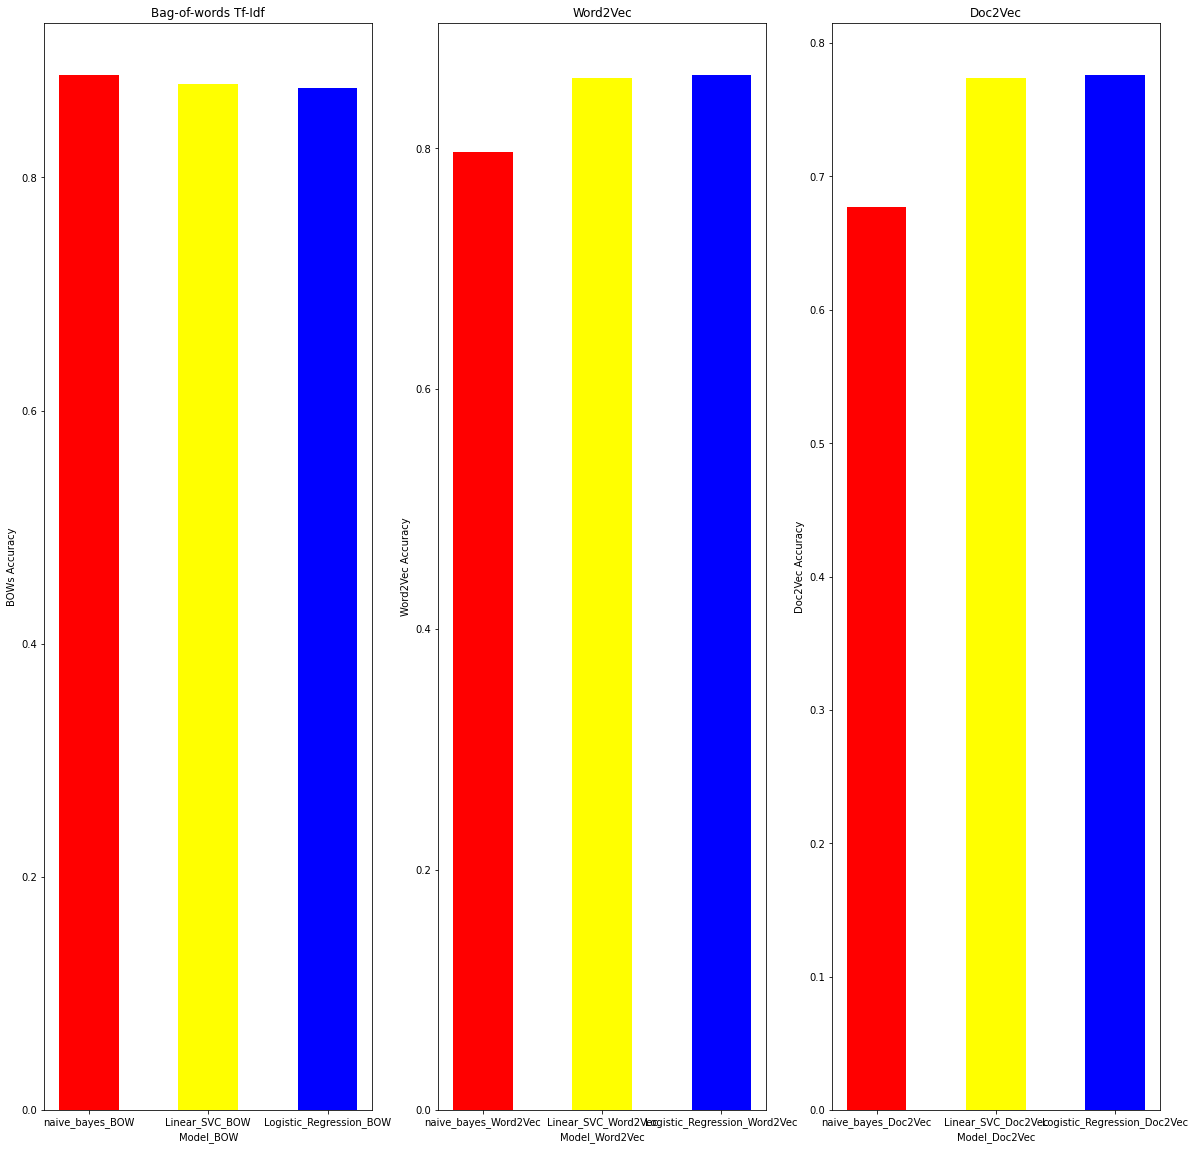

In [ ]:
fig, axes =plt.subplots(1,3, figsize=(20,20))
# Bag of Words classifiers
classifiers = ["naive_bayes_BOW", "Linear_SVC_BOW", "Logistic_Regression_BOW"]

color_discrete_map=['red', 'yellow', 'blue']
accuracy = [unseen_naive_bayes_BOW_score, unseen_Linear_SVC_BOW_score, unseen_Logistic_Regression_BOW_score]
axes[0].set_title('Bag-of-words Tf-Idf')
axes[0].set_xlabel('Model_BOW')
axes[0].set_ylabel('BOWs Accuracy')
axes[0].bar(classifiers, accuracy, color = color_discrete_map, width=0.5)


# Word2Vec classifiers
classifiers = ["naive_bayes_Word2Vec", "Linear_SVC_Word2Vec", "Logistic_Regression_Word2Vec"]

color_discrete_map=['red', 'yellow', 'blue']
accuracy = [unseen_naive_bayes_Word2Vec_score, unseen_Linear_SVC_Word2Vec_score, unseen_Logistic_Regression_Word2Vec_score]
axes[1].set_title('Word2Vec')
axes[1].set_xlabel('Model_Word2Vec')
axes[1].set_ylabel('Word2Vec Accuracy')
axes[1].bar(classifiers, accuracy, color = color_discrete_map, width=0.5)


# Doc2Vec classifiers
classifiers = ["naive_bayes_Doc2Vec", "Linear_SVC_Doc2Vec", "Logistic_Regression_Doc2Vec"]

color_discrete_map=['red', 'yellow', 'blue']
accuracy = [unseen_naive_bayes_Doc2Vec_score, unseen_Linear_SVC_Doc2Vec_score, unseen_Logistic_Regression_Doc2Vec_score]
axes[2].set_title('Doc2Vec')
axes[2].set_xlabel('Model_Doc2Vec')
axes[2].set_ylabel('Doc2Vec Accuracy')
axes[2].bar(classifiers, accuracy, color = color_discrete_map, width=0.5)